In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv("brain_stroke.csv")

In [7]:
print(f"Shape Of The Dataset : {data.shape}")

Shape Of The Dataset : (4981, 11)


In [8]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [10]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [11]:
data.describe(include=object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,4981,4981,4981,4981,4981
unique,2,2,4,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2907,3280,2860,2532,1838


In [12]:
data["age"] = data["age"].astype("int")
data["hypertension"].replace({0:"No", 1:"Yes"}, inplace = True)
data["heart_disease"].replace({0:"No", 1:"Yes"}, inplace = True)
data["stroke"].replace({0:"No", 1:"Yes"}, inplace = True)
data["ever_married"].replace({"No":"Unmarried", "Yes":"Married"}, inplace = True)
data["work_type"].replace({"Self-employed":"Self Employed","children":"Children", "Govt_job":"Government Job", "Private":"Private Job", "Never_worked":"Unemployed"}, inplace = True)
data["smoking_status"].replace({"never smoked":"Never Smoked","formerly smoked":"Formerly Smoked", "smokes":"Smokes"}, inplace = True)
data.rename(columns={"gender": "Gender","age": "Age","hypertension":"Hypertension","heart_disease":"Heart Disease","ever_married":"Marital Status","work_type":"Occupation Type","Residence_type":"Residence Type","avg_glucose_level": "Average Glucose Level","bmi":"BMI","smoking_status":"Smoking Status","stroke":"Stroke"}, inplace = True)
data = data[["Age","Gender","Marital Status","BMI","Occupation Type","Residence Type","Smoking Status","Hypertension","Heart Disease","Average Glucose Level","Stroke"]]

In [13]:
data.head()

,Age,Gender,Marital Status,BMI,Occupation Type,Residence Type,Smoking Status,Hypertension,Heart Disease,Average Glucose Level,Stroke
0,67,Male,Married,36.6,Private Job,Urban,Formerly Smoked,No,Yes,228.69,Yes
1,80,Male,Married,32.5,Private Job,Rural,Never Smoked,No,Yes,105.92,Yes
2,49,Female,Married,34.4,Private Job,Urban,Smokes,No,No,171.23,Yes
3,79,Female,Married,24.0,Self Employed,Rural,Never Smoked,Yes,No,174.12,Yes
4,81,Male,Married,29.0,Private Job,Urban,Formerly Smoked,No,No,186.21,Yes


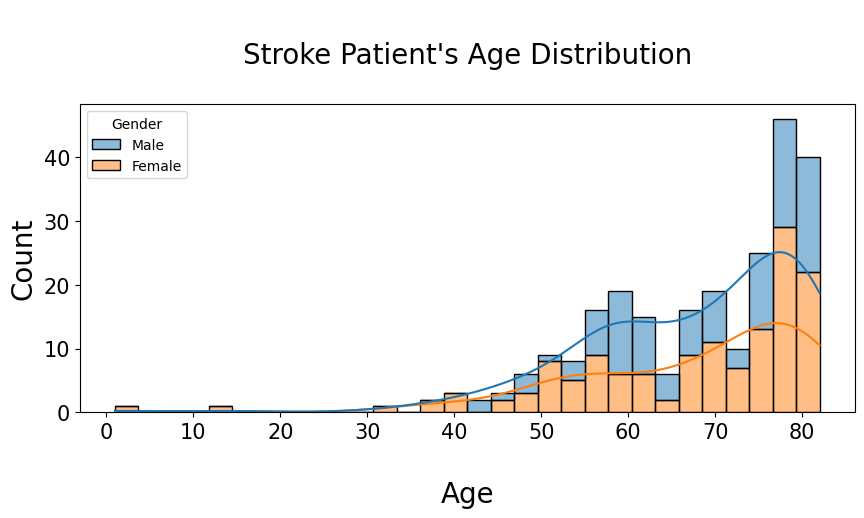

In [34]:

plt.subplots(figsize=(10, 4))
p = sns.histplot(data=data[data["Stroke"] == "Yes"],x="Age",hue="Gender",multiple="stack",kde=True,bins=30,fill=True)
p.axes.set_title("\nStroke Patient's Age Distribution\n", fontsize = 20)
p.set_ylabel("Count", fontsize = 20)
p.set_xlabel("\nAge", fontsize = 20)
p.tick_params(labelsize=15)

plt.show()

In [15]:
data[data["Stroke"] == "Yes"]["Gender"].value_counts().index[0]

'Female'

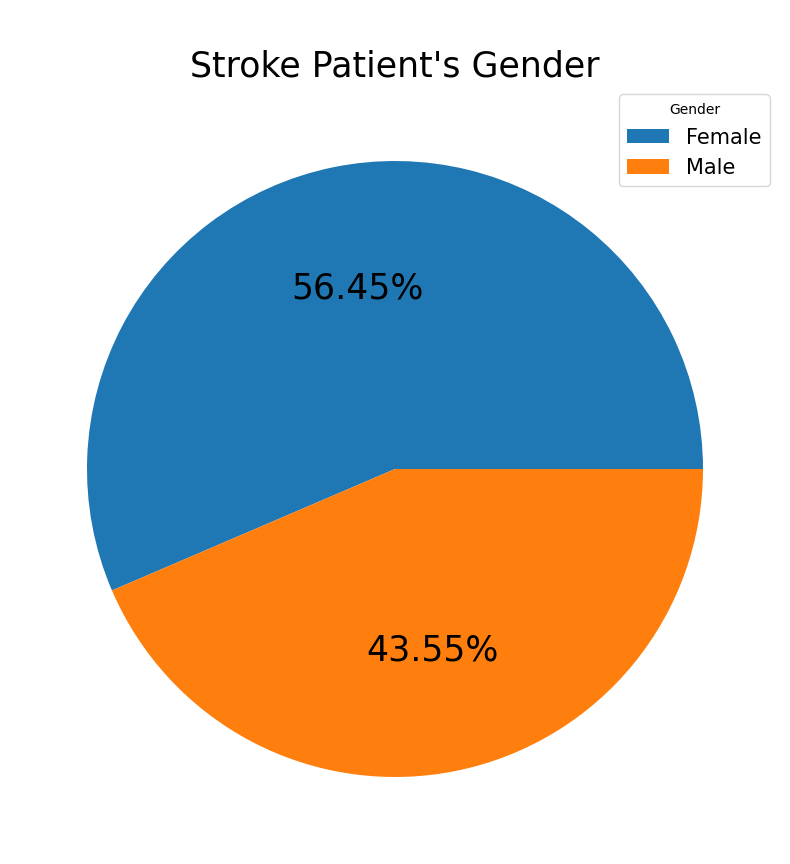

In [16]:
plt.subplots(figsize=(10, 10))

labels = "Female","Male"

plt.pie([data[data["Stroke"] == "Yes"]["Gender"].value_counts().values[0],
        data[data["Stroke"] == "Yes"]["Gender"].value_counts().values[1]],
        autopct="%.2f%%",
        textprops={'fontsize': 25})

plt.legend(labels, title="Gender", fontsize=15)
plt.title("\nStroke Patient's Gender",fontsize=25)
plt.show()

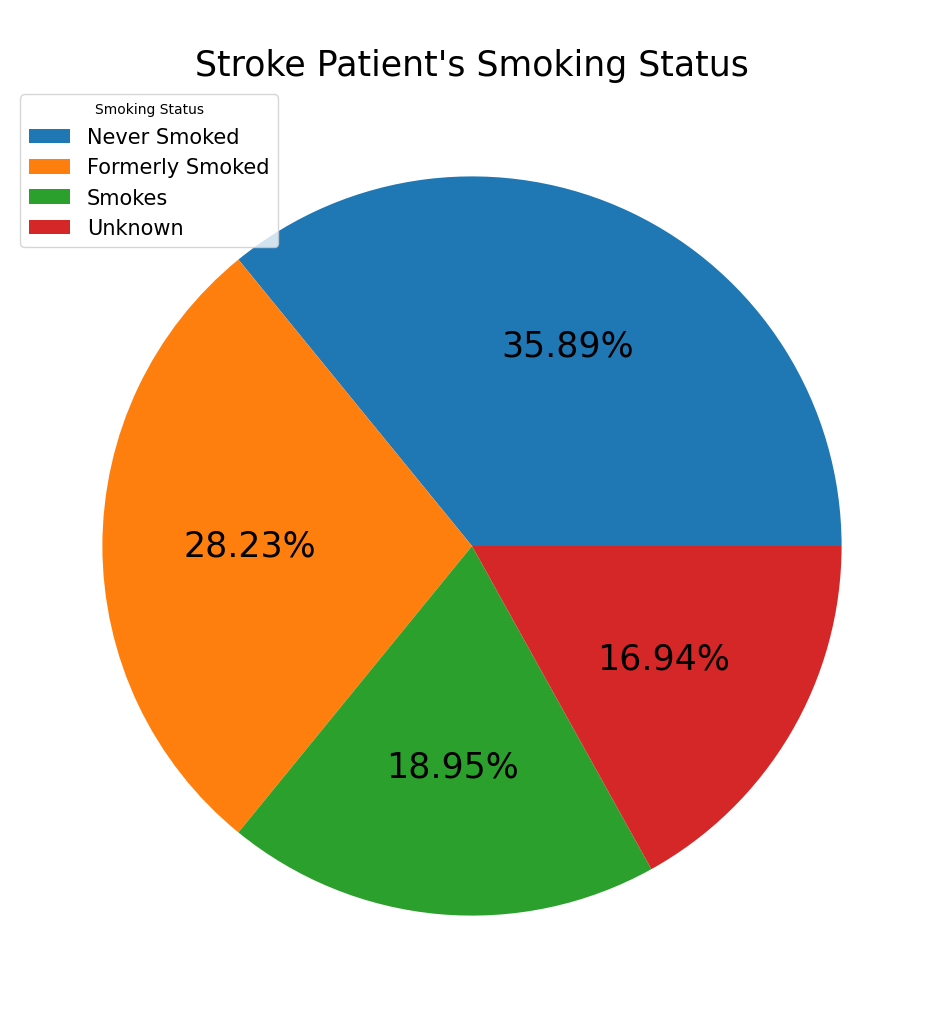

In [35]:
plt.subplots(figsize=(12, 12))

labels = "Never Smoked","Formerly Smoked","Smokes","Unknown"
size = 0.5

plt.pie([data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts().values[0],
        data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts().values[1],
        data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts().values[2],
        data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts().values[3]],
        autopct="%.2f%%",
        textprops={'fontsize': 25})

plt.legend(labels, title="Smoking Status", fontsize=15)
plt.title("\nStroke Patient's Smoking Status",fontsize=25)
plt.show()

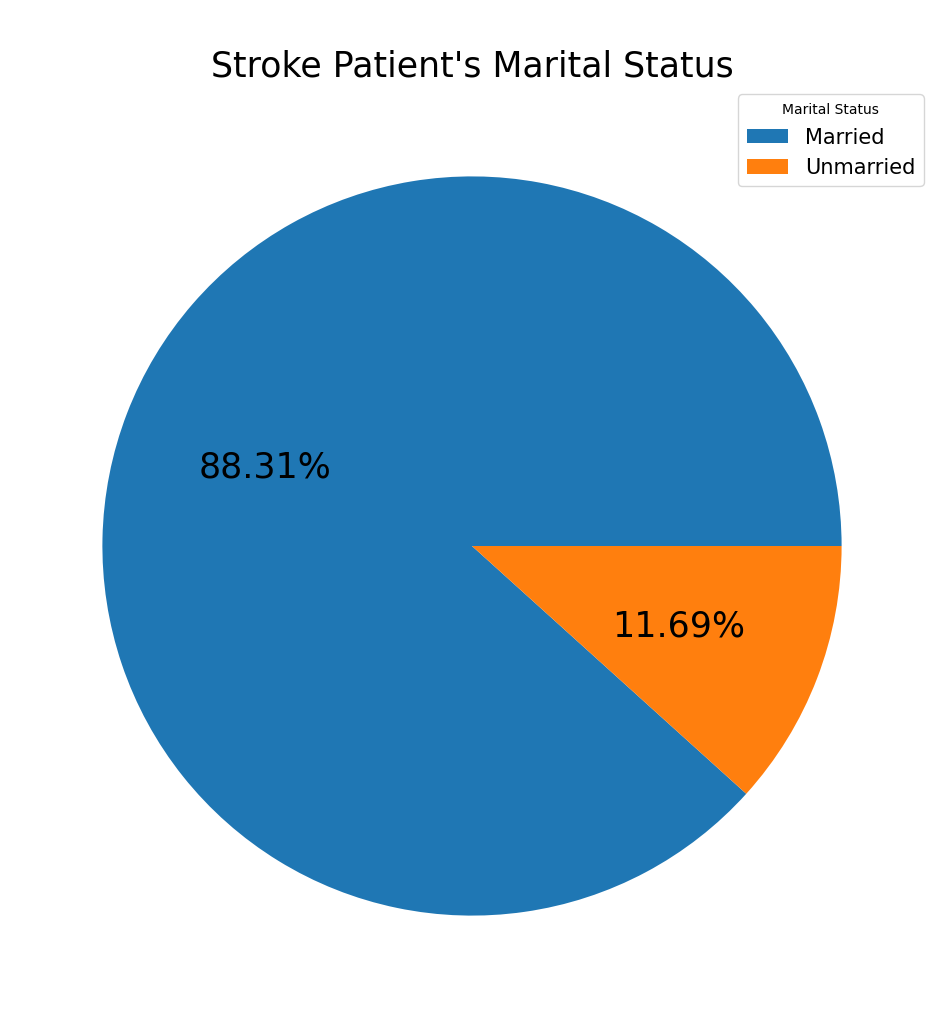

In [37]:
plt.subplots(figsize=(12, 12))

labels = "Married","Unmarried"

plt.pie([data[data["Stroke"] == "Yes"]["Marital Status"].value_counts().values[0],
        data[data["Stroke"] == "Yes"]["Marital Status"].value_counts().values[1]],
        autopct="%.2f%%",
        textprops={'fontsize': 25})

plt.legend(labels, title="Marital Status", fontsize=15)
plt.title("\nStroke Patient's Marital Status", fontsize=25)
plt.show()

Let's have a look on the distribution of stroke patient's BMI :


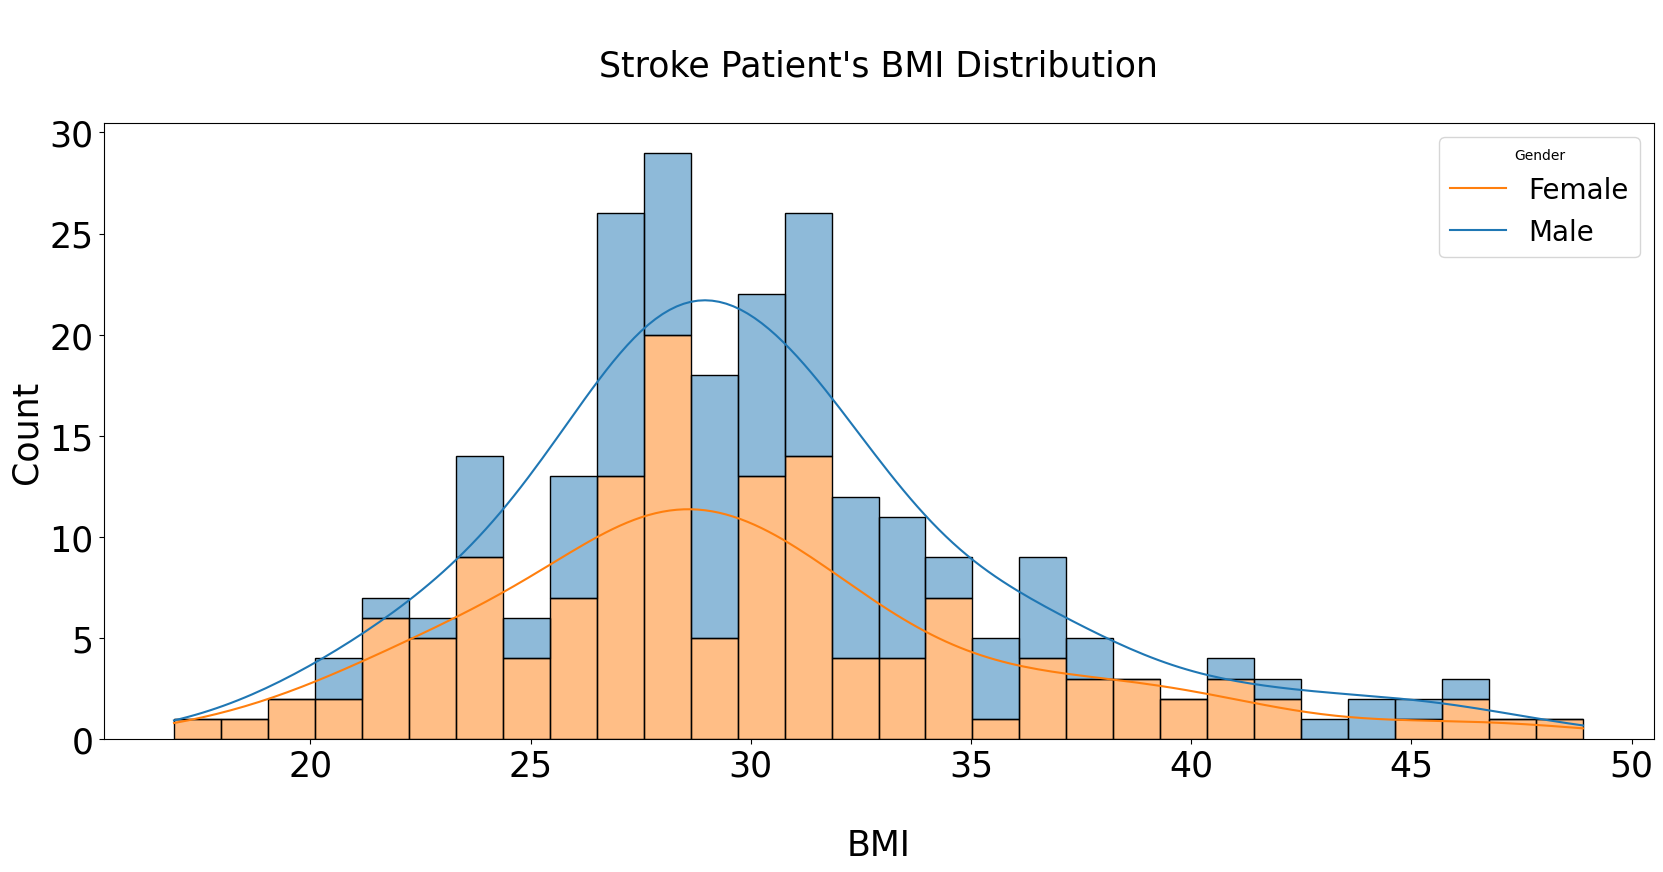

In [44]:
print(f"Let's have a look on the distribution of stroke patient's BMI :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data[data["Stroke"] == "Yes"],x="BMI",hue="Gender",multiple="stack",kde=True,bins=30,fill=True)
p.axes.set_title("\nStroke Patient's BMI Distribution\n", fontsize = 25)
p.set_ylabel("Count", fontsize = 25)
p.set_xlabel("\nBMI", fontsize = 25)
p.tick_params(labelsize=25)
labels = "Female","Male"
plt.legend(labels, title="Gender", fontsize=20)

plt.show()

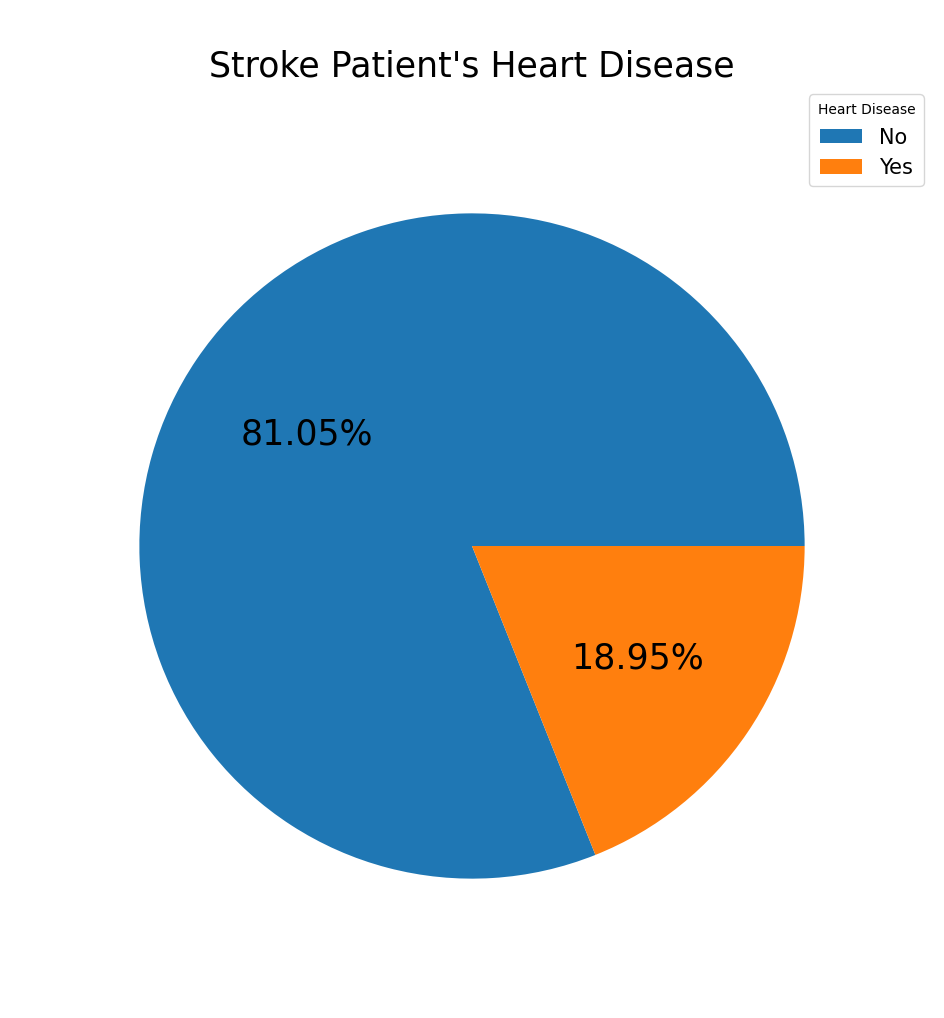

In [47]:
plt.subplots(figsize=(12, 12))

labels = "No","Yes"

plt.pie([data[data["Stroke"] == "Yes"]["Heart Disease"].value_counts().values[0],
        data[data["Stroke"] == "Yes"]["Heart Disease"].value_counts().values[1]],
        autopct="%.2f%%",
        radius=.9,
        textprops={'fontsize': 25})

plt.legend(labels, title="Heart Disease", fontsize = 15)
plt.title("\nStroke Patient's Heart Disease", fontsize = 25)
plt.show()

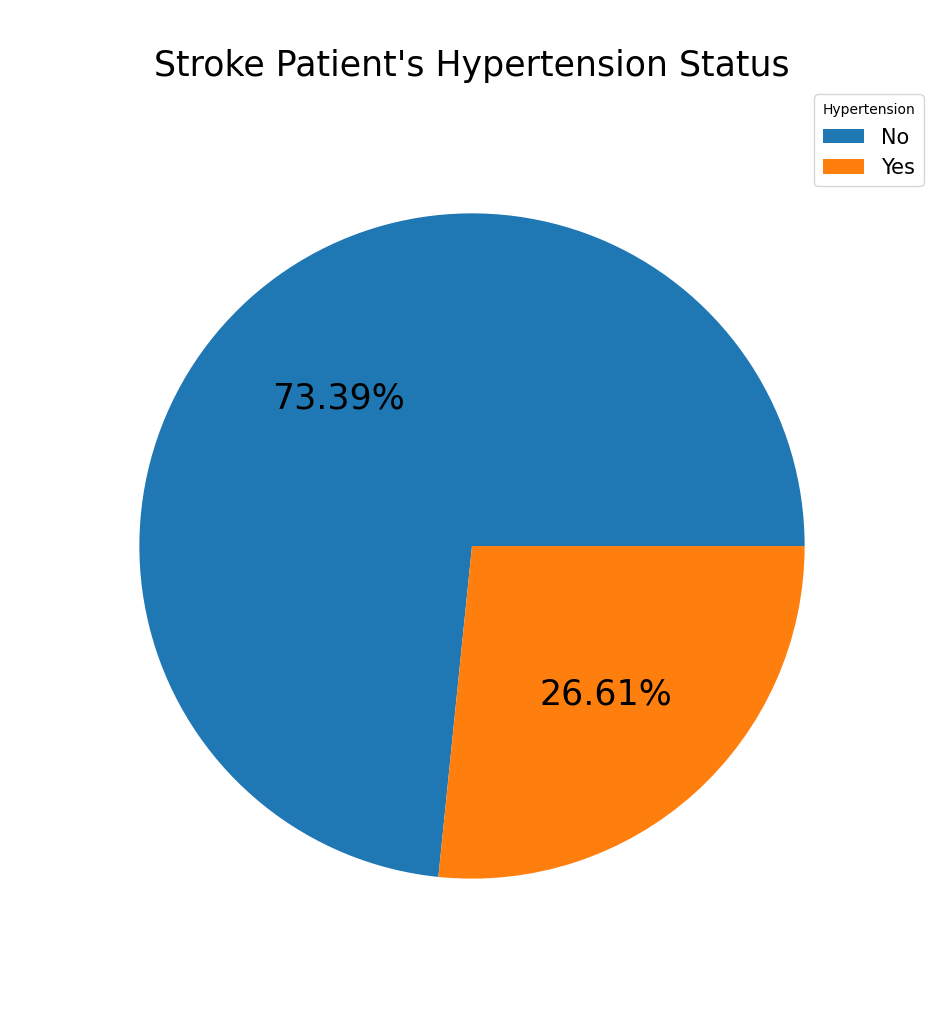

In [50]:
plt.subplots(figsize=(12, 12))

labels = "No","Yes"

plt.pie([data[data["Stroke"] == "Yes"]["Hypertension"].value_counts().values[0],
        data[data["Stroke"] == "Yes"]["Hypertension"].value_counts().values[1]],
        autopct="%.2f%%", 
        radius=.9,
        textprops={'fontsize': 25})

plt.legend(labels, title="Hypertension", fontsize = 15)
plt.title("\nStroke Patient's Hypertension Status", fontsize = 25)
plt.show()

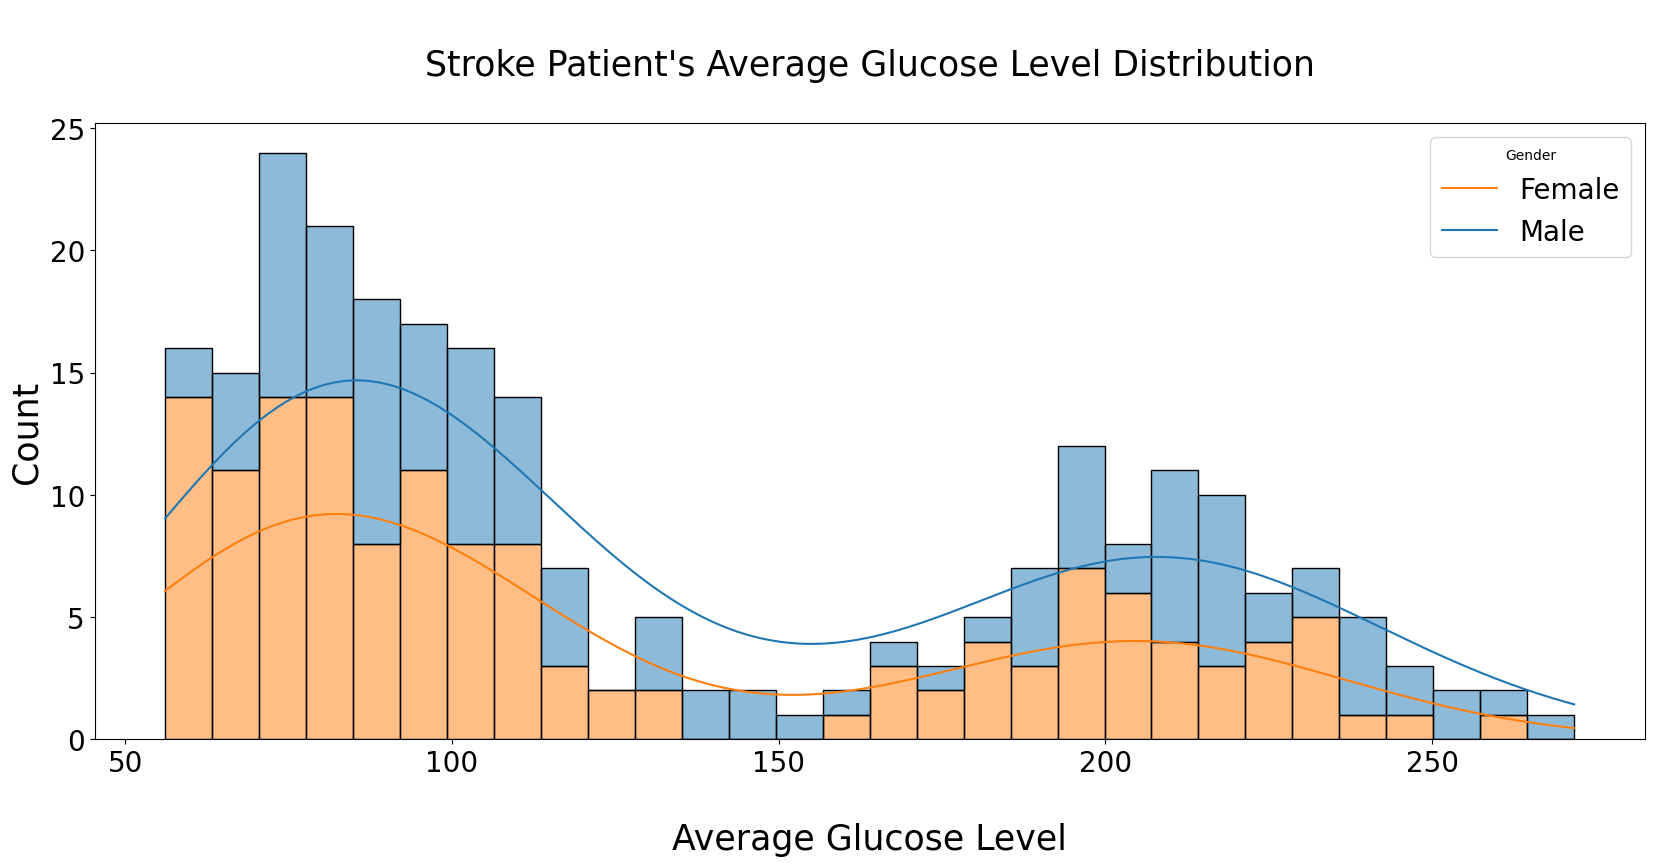

In [53]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data[data["Stroke"]=="Yes"],x="Average Glucose Level",hue="Gender",multiple="stack",kde=True,bins=30,fill=True)
p.axes.set_title("\nStroke Patient's Average Glucose Level Distribution\n", fontsize = 25)
p.set_ylabel("Count", fontsize = 25)
p.set_xlabel("\nAverage Glucose Level", fontsize = 25)
p.tick_params(labelsize=20)
labels = "Female","Male"
plt.legend(labels, title="Gender", fontsize=20)

plt.show()

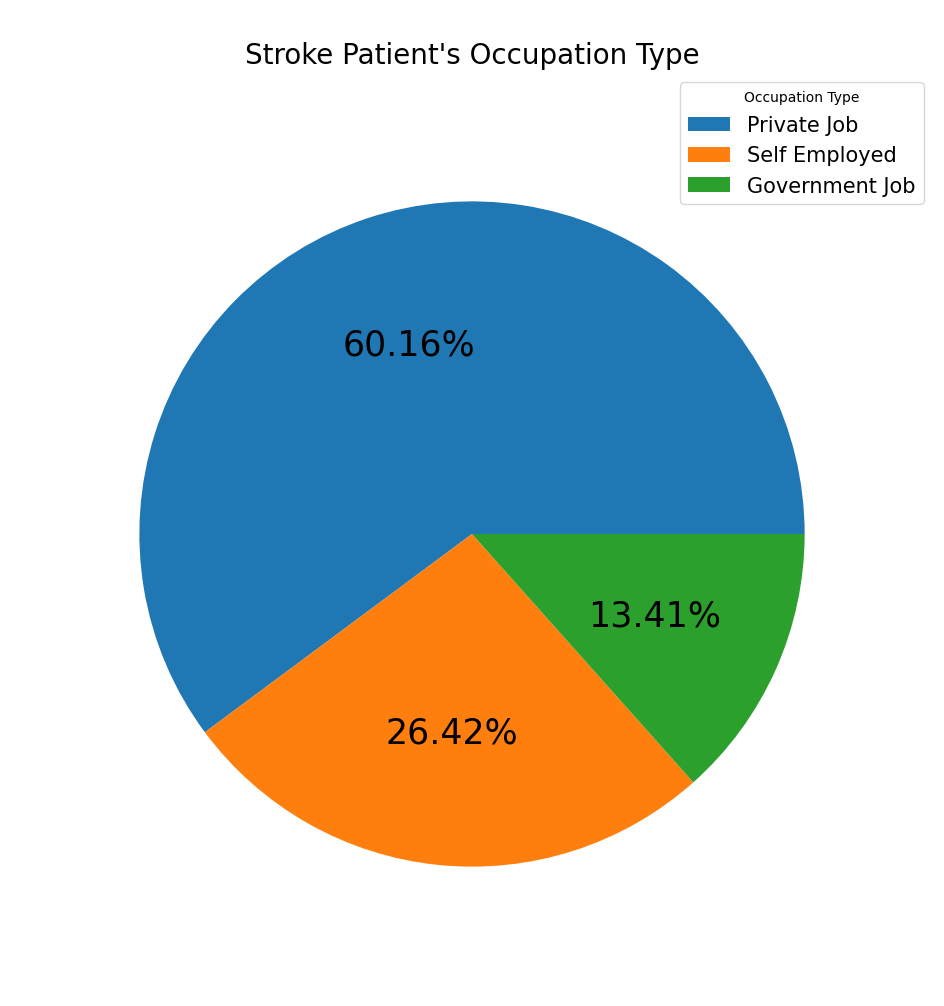

In [55]:
plt.subplots(figsize=(12, 12))

labels = "Private Job","Self Employed","Government Job"

plt.pie([data[data["Stroke"] == "Yes"]["Occupation Type"].value_counts(ascending=False).values[0],
        data[data["Stroke"] == "Yes"]["Occupation Type"].value_counts(ascending=False).values[1],
        data[data["Stroke"] == "Yes"]["Occupation Type"].value_counts(ascending=False).values[2]],
        autopct="%.2f%%", 
        radius=.9,
        textprops={'fontsize': 25})

plt.legend(labels, title="Occupation Type", fontsize = 15)
plt.title("\nStroke Patient's Occupation Type", fontsize = 20)
plt.show()